## Statistical Learning, Deep Learning and A Complete Comparison
## Ryan Ondocin

# Brief Overview:
This project will serve as an anthology for all superivised learning algoithms we have covered throughout the course of this semester in Data Analytics. Multiple ML algaoritms/Deep Neural Nets will be deployed and tuned/experimented with in order to deal with the binary classification problem of diagnosing a patient with a certain, unnspecified disease. The primary focus of this assignment will be to tune and compare more advanced algoritms such as multilayer-perceptron ANN's to simpler, less computationally expensive shallow algorithms that we have dealt with in previous assignments. 

Training Data Attributes:
 - Age: in years
 - Gender: male/female
 - Height: in unit of cm
 - Weight: in unit of kg
 - Low Blood Pressure: lower bound of blood pressure measurement
 - High Blood Pressure: higher bound of blood pressure measurement
 - Cholesterol: three cholesteral levels
 - Glucose: three glucose levels
 - Smoke: 1/0 regarding if the patient smokes
 - Alcohol: 1/0 regarding if the patient drinks alcohol
 - Exercise: 1/0 regarding if the patient exercises regularly
 - Disease: The binary target variable. Does the patient have the disease?
 
##### Due to these parameters, I believe that our target variable will have something to do with Coronary heart disease. According to the CDC, heart disease is the leading cause of death in the US and affects ~47% of Americans who have one of the following conditions: Diabetes, Overweight and obesity, Unhealthy diet, Physical inactivity, or Excessive alcohol usage. Based on this, it is apparent that our collected data is related to each of the aforementioned risk factors. We will try to build several predicition models that can accurately classify this disease and we will use these tuned algorithms to predict on a testing dataset.

# Section 1: Data Preprocessing

In [1]:
import pandas as pd #importing some necessary packages for data preprocessing and visualization  
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
df = pd.read_csv('Disease Prediction Training.csv')
df.describe()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Age        Height        Weight  Low Blood Pressure  \
count  49000.000000  49000.000000  49000.000000        49000.000000   
mean      52.853306    164.366878     74.190527          128.698939   
std        6.763065      8.216637     14.329934          147.624582   
min       29.000000     55.000000     10.000000         -150.000000   
25%       48.000000    159.000000     65.000000          120.000000   
50%       53.000000    165.000000     72.000000          120.000000   
75%       58.000000    170.000000     82.000000          140.000000   
max       64.000000    207.000000    200.000000        14020.000000   

       High Blood Pressure         Smoke       Alcohol      Exercise  \
count         49000.000000  49000.000000  49000.000000  49000.000000   
mean             96.917367      0.088265      0.054245      0.803204   
std             200.368069      0.283683      0.226503      0.397581   
min               0.000000      0.000000      0.000000      0.000000   
25%              80.000000      0.000000      0.000000      1.000000   
50%              80.000000      0.000000      0.000000      1.000000   
75%              90.000000      0.000000      0.000000      1.000000   
max           11000.000000      1.000000      1.000000      1.000000   

            Disease  
count  49000.000000  
mean       0.499959  
std        0.500005  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

###### Initial thoughts (previously covered): 
- Although there are no missing values for any attribute, I suspect that a descent amount of observations have been incorrectly inputted into our training data.
- This data consists of people primarily over the age of 50.
- High Blood Pressure probably corresponds to systolic while Low BP represents diastolic. This can be inferred from the quantile values(120/80: healthy standard). Additionally, our four continous numeric variables seem to contain some noisy outliers that will need further inspection
- Our disease class is almost perfectly split down the middle which will help us in reducing the possibility of sampling bias.

# Exploratory Data Analysis:

#### Refamiliarizing ourselves with a few distributions from the training dataframe

In [2]:
#Plotting the distribution of Height and Weight and our Binary categorical variables with respect to disease
var = ['Height','Weight','Smoke','Alcohol','Exercise']
df_cont = df[var]
for col in df_cont:
    fig = px.histogram(df, x=col, color = "Disease")
    fig.update_layout(
    autosize=False,
    width=800,
    height=300
)
    fig.show()
#Height and weight are approximately normal in distribution. Height has a large left tail which tells me that it needs to be trimmed.
#Weight is rightly skewed.
#Disease is also more common amongst females than males which is counterintuitive if this relates to Coronary disease, 
#but more females were surveyed overall(31k females to ~17.2k males)
#Heavier people were most commmonly associated with disease (sensical)
#Low Blood Pressure is EXTREMELY right-skewed, would consider masking/clipping outliers
#Same thing with High blood pressure. 
#ALMOST EVERY SINGLE PATIENT with IRREGULAR BP has the disease
#High/too high Glucose and cholesterol commonly leads to the disease
#The same trend is noted for Glucose levels for different individuals
#Much fewer people smoke, but a slightly higher proportion of those people end up having disease. Actually, its about 50/50 for both groups
#The same thing can be said for those who drink alchol. 
#Oddly enough, patients who exercise regularly are just as susceptible to this disease as those who don't, even though far more people exercise in this study rather than those who do not. 
#The disease is split exactly 50/50 which ensures that our sampling bias will be minimized, luckily. 
#df.isnull().sum()
#0 missing values from any attribute

##### NOTE: Most people claim to exercise and not smoke nor drink in our training dataset. Regardless of this, disease is still pretty evenly distributed amongst each category. Perhaps due to dishonesty this could be seen as an error in the data collection process.

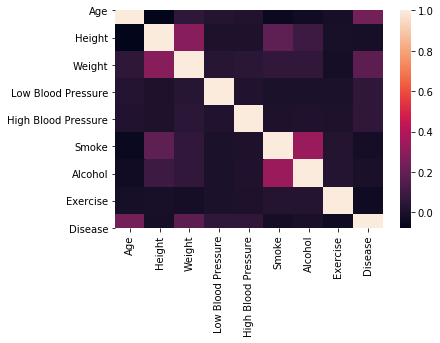

In [3]:
import seaborn as sns
sns.heatmap(df.corr()) #weight and age have the strongest positive correlation to disease, while smokers have the strongest negative correlation 
#The aforementioned attributes additionally have a negative correlation to Disease which validates my suspicions.

# Data Quality Issues/Initial thoughts (previously covered):
##### It's important to obtain some more contextual information about the patient first.
- Firstly, the data collection step is extremely flawed. Scoring things such as "Smoke"/"Alcohol"/"Exercise" on a binary scale is a difficult measure to guage. 
- How often do you smoke; 1 cigarette/week, or 1 pack/day? The same thing could be said for Alcohol and Exercise. 

- If the patient was simply asked these question on the spot, they may have a good reason to be dishonest. Their insurance premiums may rise if they answer yes.

- Alcoholism, for example could lead to liver Psoriasis which can be inferred from things such as excess Bilirupin build-up in the blood. Blood percolates through the liver, so if there's damage to it you get a high venous blood pressure which is called portal hypertension. 

- Ironically, alcohol raises HDL (good cholesterol), so if people only drink and don't smoke they rarely tend to get coronary disease, but unfortunately they may die of liver failure. This would make these discrete numerical attributes much more reliable in our model. 

- If a patients exercises 6 times/week for two hours/day, then they should have really good blood circulation but their systolic blood pressure is a bit high which means they are exerting too much energy (than for what would be considered healthy). If a patient considers moving at all as sufficient exercise than we're going to see an inconsistency in the results.  

- If a patient has other conditions such as diabetes, then their HbA1c (glucose levels) may be in an unhealthy range which could increase the chance of atherosclerosis thus increasing the chance of coronary disease. You can see how quickly the data collection process can become too expensive/not feasible. There are thousands of other factors/connditions(hereditary/habitual) that could be excellent predictors of cardiac disease but what if we also would like to quantify the type or severity of the disease. Heart disease is a blanket term and it could be used to refer to either the arteries (blockage/obstruction) or the heart in general. Arteriosclerosis occurs when the epi-cardial arteries can't provide enough enough oxygen to the heart. Monitor their LDL/HDL/Triglycerides/Cholesterol. 

### Other questions that could help

- Has anyone in their family died/been diagnosed with this disease? 
- What medications do they currently take? How often? 
- Most of the patients are older I notice, so are the younger patients(30's) there because of cardiac arrests/early signs?
- For now, I'm assuming that if the patient's Glucose level was measured then they probably have diabetes(or a family history) because it only accounts for the past 3 months and needs to be constantly monitored. 
- If the patient doesn't have diabetes nor come in for regular check-ups, are their Glucose levels automatically assigned to 'normal'?
- The same thing can be said for Cholesterol. Older people are obviously at higher risk for Coronary disease than younger people, so you would like the model to be representative of the population on which it was trained. 
- If we feed our model copious amounts of data from adolescents/teenagers/young adults, then I would expect it to perform much worse. 
- Older people come in for annnual/bi-annual check-ups with their primary care provider more often so we might have to assume that cholesterol and glucose are accurately represented throughout our training/testing data.

# Data Cleaning: 
- I've decided to clip some noisy values(HBP/LBP)according to their distributions. (1% and 98% percentile) 
- These clipped values were then replaced with nan values and imputed using MICE.

In [4]:
var = ['Height','Weight','High Blood Pressure','Low Blood Pressure']
df_cont = df[var]
print(df_cont.quantile(0.01, numeric_only=True))
print(df_cont.quantile(0.98, numeric_only=True))

Height                 147.0
Weight                  48.0
High Blood Pressure     60.0
Low Blood Pressure      90.0
Name: 0.01, dtype: float64
Height                 181.0
Weight                 110.0
High Blood Pressure    110.0
Low Blood Pressure     170.0
Name: 0.98, dtype: float64


In [5]:
# Clipping Blood Pressure to their Upper/Lower Fence Values   
df["High Blood Pressure"] = df["High Blood Pressure"].clip(upper=106)#Upper Fence = 105 
df["High Blood Pressure"] = df["High Blood Pressure"].clip(lower=65)# Lower Fence = 65 
df["Low Blood Pressure"] = df["Low Blood Pressure"].clip(upper=171)#Upper Fence = 170
df["Low Blood Pressure"] = df["Low Blood Pressure"].clip(lower=89) #Lower Fence = 90
# Clipping Height and Weight values to their 1st Percentile
df["Height"] = df["Height"].clip(lower=147)
df["Weight"] = df["Weight"].clip(lower=49)

In [6]:
#Replacing outliers with a value of NAN
df.loc[df['High Blood Pressure'] == 106,'High Blood Pressure'] = np.nan
df.loc[df['High Blood Pressure'] == 65,'High Blood Pressure'] = np.nan
df.loc[df['Low Blood Pressure'] == 171,'Low Blood Pressure'] = np.nan
df.loc[df['Low Blood Pressure'] == 89,'Low Blood Pressure'] = np.nan
df.loc[df['Weight'] == 49,'Weight'] = np.nan
df.loc[df['Height'] == 147,'Height'] = np.nan

# Mapping categorical to discrete values. 
- This is a necessary preprocessing step given that a majority of our Supervised Learning algorithms require numeric attributes in order to produce a result

In [7]:
#NOTE: HERE Males are being listed as 1 and females as 0. This assignment was completely arbitrary but necessary for our models (numeric)
df["Gender"] = df["Gender"].map({'male': 1, 'female': 0})
#df = pd.get_dummies(df, columns = ['Gender','Cholesterol','Glucose'])
df["Cholesterol"] = df["Cholesterol"].map({'too high': 2, 'high': 1, 'normal':0}) 
df["Glucose"] = df["Glucose"].map({'too high': 2, 'high': 1, 'normal':0})

# Filling remaining numerical NAs with MICE imputation (previously covered):

I've used multiple imputations to account for the uncertainty association  between each imputation opposed to if I were to use KNearest Neighbors. Single imputation doesn't acount for that so MICE will help us find the most likely value overall. 

MICE essentially uses multiple regression to map the distributions of each value in order to accurately impute what is missing. I've found that this method is very flexible and much less time consuming than if I were to use KNearest Neighbors.

Although Low/High BP constitute a large portion of outliers in our data set, they do show a strong correlation to disease. I initially tried dropping outliers from our models, however recall was notably increased after I decided to use this imputation measure instead

In [8]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_MICE = df
df_MICE.iloc[:,:] = MICE_imputer.fit_transform(df)

Using TensorFlow backend.


# Final EDA of our cleaned Dataframe

In [9]:
df = df_MICE
df.describe() #cleaned dataframe

Age        Gender        Height        Weight  \
count  49000.000000  49000.000000  49000.000000  49000.000000   
mean      52.853306      0.349735    164.641584     74.519477   
std        6.763065      0.476891      7.550732     13.918317   
min       29.000000      0.000000    148.000000     50.000000   
25%       48.000000      0.000000    159.000000     65.000000   
50%       53.000000      0.000000    165.000000     72.000000   
75%       58.000000      1.000000    170.000000     82.000000   
max       64.000000      1.000000    207.000000    200.000000   

       Low Blood Pressure  High Blood Pressure   Cholesterol       Glucose  \
count        49000.000000         49000.000000  49000.000000  49000.000000   
mean           126.429702            81.794306      0.366184      0.225898   
std             15.399712             7.985393      0.679301      0.571623   
min             90.000000            66.000000      0.000000      0.000000   
25%            120.000000            80.000000      0.000000      0.000000   
50%            120.000000            80.000000      0.000000      0.000000   
75%            140.000000            90.000000      1.000000      0.000000   
max            170.000000           105.000000      2.000000      2.000000   

              Smoke       Alcohol      Exercise       Disease  
count  49000.000000  49000.000000  49000.000000  49000.000000  
mean       0.088265      0.054245      0.803204      0.499959  
std        0.283683      0.226503      0.397581      0.500005  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      1.000000      0.000000  
50%        0.000000      0.000000      1.000000      0.000000  
75%        0.000000      0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

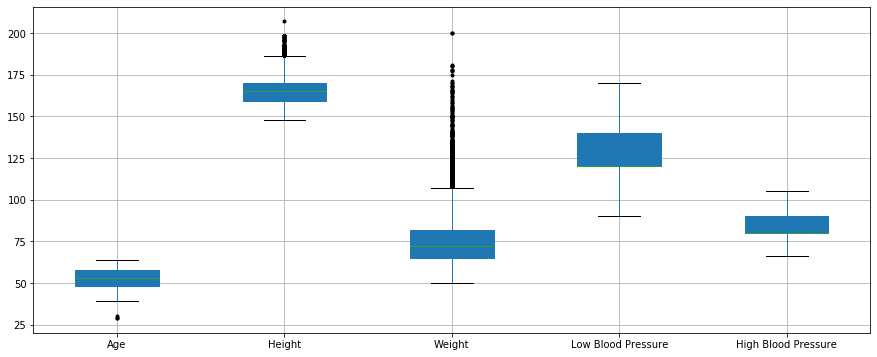

In [10]:
plt.subplots(figsize=(15,6))
df[['Age','Height','Weight','Low Blood Pressure','High Blood Pressure']].boxplot(patch_artist=True,sym="k.")

In [11]:
#df.to_csv('df_preprocessed.csv', index=False) for google collab 

# Section 2: Build, tune and evaluate various machine learning algorithms 

In [12]:
#Importing necessary packages for Our initial models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Logistic Regression Modeling: 

#### NOTE: The goal for each supervised learning model is to maximize recall

We would like to maximize recall in this context because it is better to predict that a patient has this disease when they're healthy than to throw a FalseNegative when they indeed do have it. This could lead to people missing the critical time window for proper care and should be considered a life or death situation. 
- That being said, we don't want to completely compromise accuracy just for the sake of recall; i.e.. A really bad model could predict that the patient has the disease 100% of the time for example. 


In the case of ANN's we will only be tuning the model on mminimum values from the binary cross entropy loss functions, which are paired with model accuracy. These models(MLPs)tend to show more balanced results across each metric which is why the ANN predictions will still be ranked by order of recall. 

### Scaling/ splitting the data:

In [13]:
scaler = MinMaxScaler()
scaler.fit(df.drop('Disease',axis=1))
scaled_features = scaler.transform(df.drop('Disease',axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Disease'],
                                                    test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)

(34300, 11)
(34300,)


#### NOTE: 
- Scaling the data did not have much of an impact on model performance however it did boost recall by ~0.5 % which is why it was passed through our Logistic Regression Classifier.  
- I believe this has to do with how adequately we dealt with outliers in the preprocessing step; so the default 'l2' penalty function didn't yield any major metric changes before/after scaling. 
- The only remaining attributes that contain outliers (above the whisker) are height and weight, which are plausible(especially in the United States), thus these demand slightly more emphasis when creating an efficient classifier. One method to deal with this collinearity in our shallow learning algorithms would be to create a separate columnn such as BMI which  would combine height and weight into a new feature that would tell us more about each. observation and reduce model complexity(fewer attributes).

# Logistic Regression Training and Testing

In [14]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#logr_clf = make_pipeline(MinMaxScaler(),LogisticRegression()) #MinMaxScaler())
logr_clf = LogisticRegression(solver='lbfgs', random_state=42)
logr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_lr = logr_clf.predict(X_test)

In [16]:
#confusion_matrix = pd.crosstab(y_test, y_lr, rownames=['Actual'], colnames=['lricted'])
from sklearn import metrics
print(f"Precision:  {round(metrics.precision_score(y_test,y_lr)*100,3)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_lr)*100,3)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_lr)*100,3)}%")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_lr))
print(classification_report(y_test,y_lr))

Precision:  76.104%
Recall:  67.771%
Accuracy: 72.973%
[[5695 1580]
 [2393 5032]]
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74      7275
         1.0       0.76      0.68      0.72      7425

    accuracy                           0.73     14700
   macro avg       0.73      0.73      0.73     14700
weighted avg       0.73      0.73      0.73     14700



# Tuning Logistic Regression Model


### Default Parameters
- penalty: default=’l2’ : Squared distance --> higher penalty for outliers (weight)
Specifies norm penalization.
- ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties which is what we want to focus on in the context of this function. 
- Dual formulation only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.

‘liblinear’ only supports 'l2'
fit_interceptbool, default=True
Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
class_weightdict or ‘balanced’, default=None
multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. This makes liblinear even more palatable in the context of our model tuning/

- C (Cost): penalty associated with misclassification error. Defaulty set to 1
- Lower C: hig bias but lower variance 
- want a smaller C here because it will give us a large margin (susceptible to some classification errors, but in a sense where we don't want to tell sick patients they do not have the disease when they do. 
- this will balance out all of of our metrics (increase recall but reduce accuracy)which is desireable to a certain point inn the context of this business problem

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
param_grid = {'C':[0.001,0.1,1],
              'solver':['liblinear'],
              'penalty':['l2']
              }#'max_iter':[1000]}
grid = GridSearchCV(logr_clf, param_grid, cv=10, scoring='recall')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [18]:
bestLR = grid.best_estimator_
bestLR.fit(X_train,y_train)

print(grid.best_params_)
y_lr = bestLR.predict(X_test)

print(confusion_matrix(y_test,y_lr))
print('\n')
print(classification_report(y_test,y_lr))
print(f"Precision:  {round(metrics.precision_score(y_test,y_lr)*100,3)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_lr)*100,3)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_lr)*100,3)}%")

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
[[5148 2127]
 [2192 5233]]


              precision    recall  f1-score   support

         0.0       0.70      0.71      0.70      7275
         1.0       0.71      0.70      0.71      7425

    accuracy                           0.71     14700
   macro avg       0.71      0.71      0.71     14700
weighted avg       0.71      0.71      0.71     14700

Precision:  71.101%
Recall:  70.478%
Accuracy: 70.619%


#### NOTE: Increased Recall by 3% while reducing accuracy and precision
- MinMaxScaler allowed this model to become more balanced following gridsearch while StandardScaler didn't show any improvement on recall. 
- It's clear that if we kept decreasing cost i.e.. C : 0.00001: that recall would increase to ~100% and accuracy/precision would decrease as a result
- For this reason we are balancing the two metrics to make the model more generalizeable. Although it's less accurate, it could result in earlier detection of the disease

### creating a function to print out our ROC_Curve

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def roc_curve_plot(clf, title, label):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    #print('No Skill: ROC AUC=%.2f' % (ns_auc))
    print(f"ROC AUC:  {round((lr_auc)*100,2)}%")
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.figure(figsize=(12,8))
    plt.title(title)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=label)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

ROC AUC:  77.23%


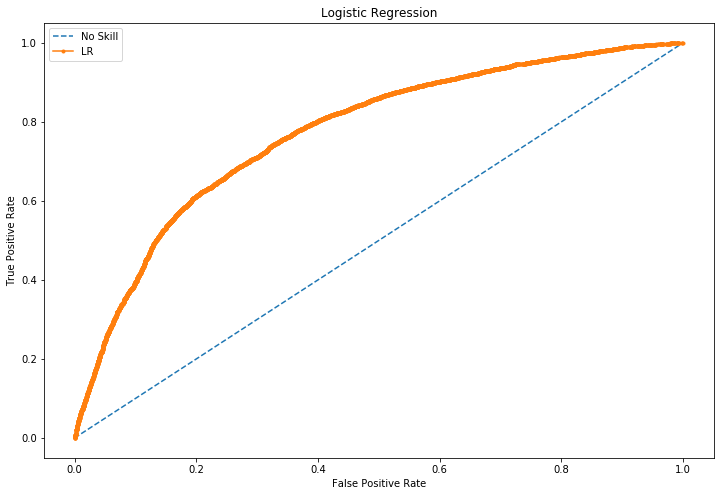

In [20]:
roc_curve_plot(bestLR, 'Logistic Regression', 'LR')
# our area under the curve indicates that this model is much more accurate than if you were to guess
#it is a bit jagged between 0.4-0.6 for the TPR which reflects how we were. trying to tarin this model

# ANN Modeling: 
Now we will explore Artificial Neural Network's with up to 2 hidden layers. Note that each model has been GridSearched  in google collab in order to obtain the satisfactory hyperparameters.

- ANN's can handle multicollinearity so things such as Height and Weight won't stifle our model. This is one of the advantages of deep learning over some of the previous shallow algoprithms we've used.
- Standard Scalar was applied to avoid dying nodes based on certain weights associated with our features. This means the rest of the network won't be offset by different metrics/units of measurement for each attribute.
- binary probabilistic distribution means outputs must add to 1 and that the results are mutually exclusive

# MODEL Tuning:
#### Model Hyper-Parameters to Tune in Deep Learning
- we started off with 0 hidden layers meaning that our 11 features were squished into one node between 0 and 1 using a sigmoid function. 
- Loss function: Set to Binary_crossentropy since we are essentially dealing with a probability distribution for each predicted class.
- Activation function: rectified linear unit for hidden layers and sigmoid for output layers.
- Rectified Linear Units were used in the hidden layers because they helped reduce the likelihood of a vaninshing gradient (occurs with sigmoids becominng increasingly smaller over a training time)
- Sparsity is also a huge benifit of ReLu (hidden layers) because any activation output < 0 is automatically set to 0. This is opposed to sigmoid activation functions which are almost always going to produce some sort of non zero value between 0 and 1. 
- Optimization method: Adam was chosen for each method: it's classical stochastic gradient descent proved to be just as efficient as SGD and other methods. Additionally, it's straightforward implementation and wide-use across industry, made it suitable for our classification task. 
- Neural nets can face the problem of plateuing at times. A Majority of this issue can be solved usinng the EarlyStoppingCallBack from the keras package. Patience = 15 means the model waits 15 epochs to check if val_loss decreases further before stopping the training process. This method was used as a means of guaging out how many epochs our original model was going to need to converge on a minnima

In [21]:
#Neural nets can face the problem of plateaus. 
#Patience = 15 means the model waits 15 epochs to check if 
#val_loss decreases further before stopping the training process. 
from keras.callbacks import EarlyStopping
e_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=15,verbose=0, mode='auto')

- val_loss is binary for our cross-validation data
- loss is the value of cost function for our training data. 
- On validation data, neurons using drop out do not drop random neurons. The reason is that durinng training we gennerally use noise to inncrease noise that helps our model avoid the issue of over-fitting. 

In [22]:
# ANN0 layer neural network
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import cross_validate
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(df.drop('Disease',axis=1))
scaled_features = scaler.transform(df.drop('Disease',axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Disease'],
                                                    test_size=0.30, random_state=42)
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
ANN0 = Sequential()
# Adding the output layer
ANN0.add(Dense(output_dim = 1, activation = 'sigmoid',input_dim=11)) 
# Compiling the ANN
ANN0.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
ANN0.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 100, epochs = 27, callbacks=[e_stop])
#Making the predictions and evaluating the model
# Predicting the Test set results
y_pred_ANN0 = ANN0.predict(X_test)
y_pred_ANN0 = (y_pred_ANN0 > 0.5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_dim=11, units=1)`



Train on 34300 samples, validate on 14700 samples
Epoch 1/27
34300/34300 [==============================] - 0s 14us/step - loss: 0.8653 - accuracy: 0.5086 - val_loss: 0.7547 - val_accuracy: 0.5561
Epoch 2/27
34300/34300 [==============================] - 0s 10us/step - loss: 0.6915 - accuracy: 0.6003 - val_loss: 0.6451 - val_accuracy: 0.6327
Epoch 3/27
34300/34300 [==============================] - 0s 11us/step - loss: 0.6145 - accuracy: 0.6636 - val_loss: 0.5951 - val_accuracy: 0.6854
Epoch 4/27
34300/34300 [==============================] - 0s 14us/step - loss: 0.5804 - accuracy: 0.7018 - val_loss: 0.5737 - val_accuracy: 0.7101
Epoch 5/27
34300/34300 [==============================] - 1s 16us/step - loss: 0.5664 - accuracy: 0.7177 - val_loss: 0.5647 - val_accuracy: 0.7214
Epoch 6/27
34300/34300 [==============================] - 0s 11us/step - loss: 0.5606 - accuracy: 0.7226 - val_loss: 0.5607 - val_accuracy: 0.7274
Epoch 7/27
34300/34300 [==============================] - 0s 10us/st

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(f"Precision:  {round(metrics.precision_score(y_test,y_pred_ANN0)*100,3)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_pred_ANN0)*100,3)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_ANN0)*100,3)}%")
print(confusion_matrix(y_test,y_pred_ANN0))
print(classification_report(y_test,y_pred_ANN0))

Precision:  76.279%
Recall:  67.865%
Accuracy: 73.109%
[[5708 1567]
 [2386 5039]]
              precision    recall  f1-score   support

         0.0       0.71      0.78      0.74      7275
         1.0       0.76      0.68      0.72      7425

    accuracy                           0.73     14700
   macro avg       0.73      0.73      0.73     14700
weighted avg       0.73      0.73      0.73     14700



In [24]:
def roc_curve_ANN(clf, title, label):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    #print('No Skill: ROC AUC=%.2f' % (ns_auc))
    print(f"ROC AUC:  {round((lr_auc)*100,2)}%")
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.figure(figsize=(12,8))
    plt.title(title)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=label)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

ROC AUC:  79.55%


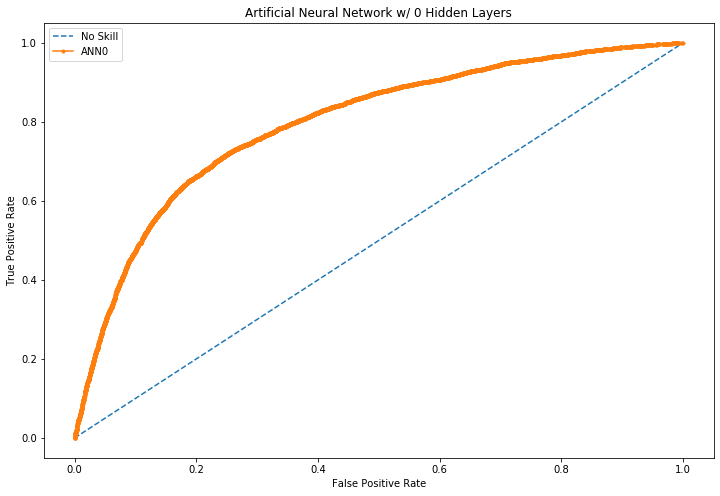

In [25]:
roc_curve_ANN(ANN0,"Artificial Neural Network w/ 0 Hidden Layers","ANN0")

# Comparing Logistic Regression with linear SVM, and single layer perceptron:
- All of these models are operating on a similar principal which, in turn is leading to extremely similar results.
#### This is in part due to the fact that the fitted logistic regression is a sigmoid curve   ( output layer : ANN0) representing the probability of a person having the disease given those 11 features. The probability distributions for each datapoint is mapped out and  then, via backpropahation, penalized by taking the and negative log of the probability which introduces our idea of a loss function


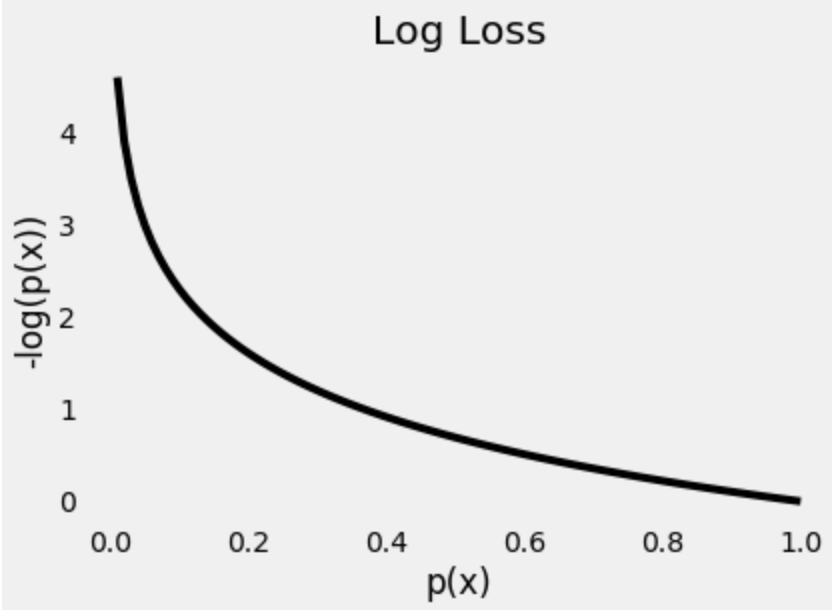
- The early stopping technique helped us in determining where loss of the model was minimized. The patience of 10 epochs allowed the model to keep exploring the training data to determine if the loss of the model could change further(local minima). 

- This model seemed to bottom out at 0.5535 loss on the training data and 0.5545 on the validation loss indicating that this  fit nicely into our validation data. If our val_loss was less than our loss, this would be an issue.
- As the probability of the actual true class gets closer to 0, the -log of loss increases exponentially; thus the mean of all these losses is representative of the label's distribution in the data itself which is why I think these three models performed so similarly. The batch size of 100 was manually changed, periodically throughout this experiment however batch sizes that were too small < 10 would take much longer to be passed through our network. 
- In the LR we have the lowest C which maximizes the margin between each point and it's hyperplane. Given  that outliers(continuous numeric variables) were winsorized and then imputed using MICE, we will end up with lower variance overall.
- Both linear SVM annd LR utilized a low Cost parameter in order to maximize recall

# ANN Continued: 1 Layer Hiddenn Layer

In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [31]:
#Initialising the ANN
ANN1 = Sequential()
# Adding the input layer and the first hidden layer
ANN1.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
# Adding the output layer
ANN1.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
ANN1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
ANN1.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 88, epochs = 120) #callbacks = [e_stop])
# Predicting the Test set results
y_pred_ANN1 = ANN1.predict(X_test)
y_pred_ANN1 = (y_pred_ANN1 > 0.5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`



Train on 34300 samples, validate on 14700 samples
Epoch 1/120
34300/34300 [==============================] - 1s 16us/step - loss: 0.6097 - accuracy: 0.6885 - val_loss: 0.5550 - val_accuracy: 0.7280
Epoch 2/120
34300/34300 [==============================] - 1s 15us/step - loss: 0.5502 - accuracy: 0.7276 - val_loss: 0.5484 - val_accuracy: 0.7299
Epoch 3/120
34300/34300 [==============================] - 0s 14us/step - loss: 0.5467 - accuracy: 0.7305 - val_loss: 0.5466 - val_accuracy: 0.7304
Epoch 4/120
34300/34300 [==============================] - 0s 14us/step - loss: 0.5454 - accuracy: 0.7322 - val_loss: 0.5463 - val_accuracy: 0.7314
Epoch 5/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5451 - accuracy: 0.7326 - val_loss: 0.5457 - val_accuracy: 0.7313
Epoch 6/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5449 - accuracy: 0.7331 - val_loss: 0.5454 - val_accuracy: 0.7313
Epoch 7/120
34300/34300 [==============================] - 0s 

Epoch 56/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5427 - accuracy: 0.7343 - val_loss: 0.5435 - val_accuracy: 0.7340
Epoch 57/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5427 - accuracy: 0.7351 - val_loss: 0.5434 - val_accuracy: 0.7355
Epoch 58/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5427 - accuracy: 0.7349 - val_loss: 0.5435 - val_accuracy: 0.7346
Epoch 59/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5426 - accuracy: 0.7343 - val_loss: 0.5434 - val_accuracy: 0.7345
Epoch 60/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5427 - accuracy: 0.7343 - val_loss: 0.5435 - val_accuracy: 0.7342
Epoch 61/120
34300/34300 [==============================] - 0s 12us/step - loss: 0.5425 - accuracy: 0.7354 - val_loss: 0.5433 - val_accuracy: 0.7351
Epoch 62/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5426 - accuracy: 0.7349

Epoch 111/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5416 - accuracy: 0.7348 - val_loss: 0.5435 - val_accuracy: 0.7352
Epoch 112/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5418 - accuracy: 0.7348 - val_loss: 0.5429 - val_accuracy: 0.7359
Epoch 113/120
34300/34300 [==============================] - 0s 13us/step - loss: 0.5417 - accuracy: 0.7351 - val_loss: 0.5429 - val_accuracy: 0.7355
Epoch 114/120
34300/34300 [==============================] - 1s 18us/step - loss: 0.5417 - accuracy: 0.7343 - val_loss: 0.5431 - val_accuracy: 0.7365
Epoch 115/120
34300/34300 [==============================] - 1s 16us/step - loss: 0.5417 - accuracy: 0.7343 - val_loss: 0.5433 - val_accuracy: 0.7358
Epoch 116/120
34300/34300 [==============================] - 1s 16us/step - loss: 0.5416 - accuracy: 0.7354 - val_loss: 0.5430 - val_accuracy: 0.7365
Epoch 117/120
34300/34300 [==============================] - 1s 17us/step - loss: 0.5415 - accuracy:

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(f"Precision:  {round(metrics.precision_score(y_test,y_pred_ANN1)*100,3)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_pred_ANN1)*100,4)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_ANN1)*100,4)}%")
print(confusion_matrix(y_test,y_pred_ANN1))
print(classification_report(y_test,y_pred_ANN1))

Precision:  75.862%
Recall:  69.9663%
Accuracy: 73.585%
[[5622 1653]
 [2230 5195]]
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74      7275
         1.0       0.76      0.70      0.73      7425

    accuracy                           0.74     14700
   macro avg       0.74      0.74      0.74     14700
weighted avg       0.74      0.74      0.74     14700



### This is the best model we have seen thus far in terms of balancing recall precision annd accuracy

ROC AUC:  80.18%


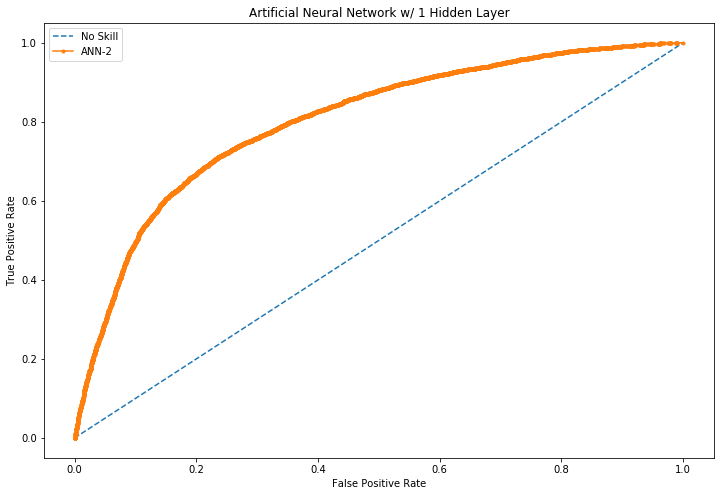

In [33]:
roc_curve_ANN(ANN1, 'Artificial Neural Network w/ 1 Hidden Layer','ANN-2')

#### Grid  Search CV 

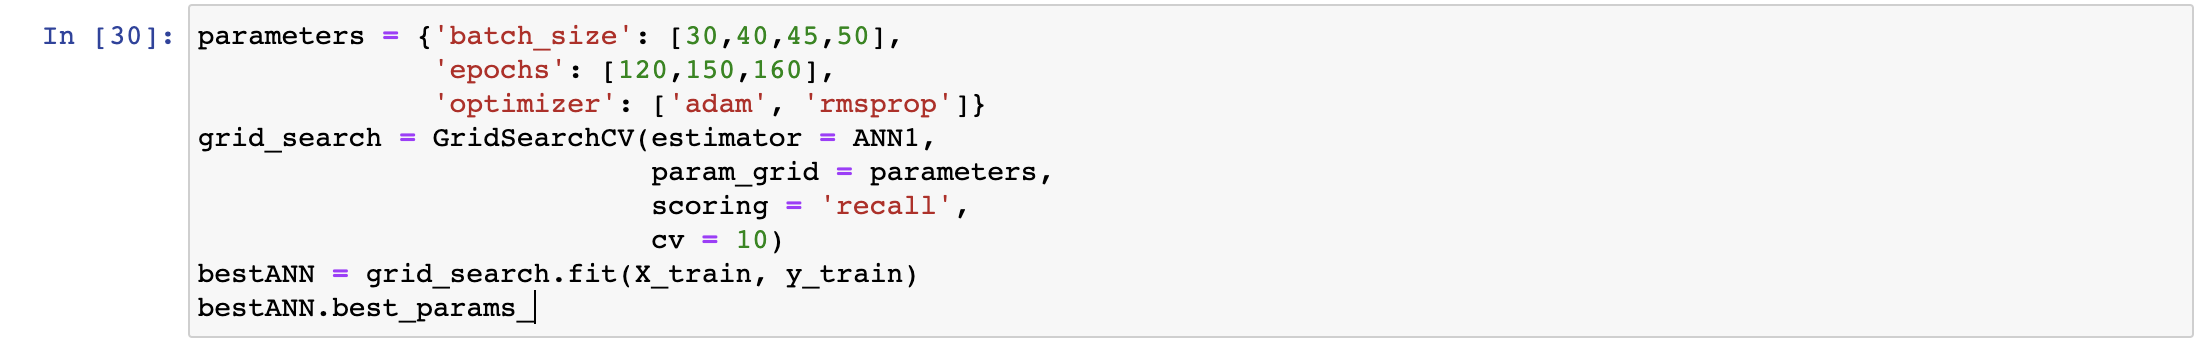

In [34]:
#Initialising the ANN
ANN2 = Sequential()
# Adding the input layer and the first hidden layer
ANN2.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))
# Adding the second hidden layer
ANN2.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
# Adding the output layer
ANN2.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
ANN2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
ANN2.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 42, epochs = 110) #callbacks = [e_stop])#200
# Predicting the Test set results
y_pred_ANN2 = ANN2.predict(X_test)
y_pred_ANN2 = (y_pred_ANN2 > 0.5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`



Train on 34300 samples, validate on 14700 samples
Epoch 1/110
34300/34300 [==============================] - 1s 39us/step - loss: 0.5755 - accuracy: 0.7205 - val_loss: 0.5457 - val_accuracy: 0.7299
Epoch 2/110
34300/34300 [==============================] - 1s 33us/step - loss: 0.5445 - accuracy: 0.7326 - val_loss: 0.5439 - val_accuracy: 0.7325
Epoch 3/110
34300/34300 [==============================] - 1s 36us/step - loss: 0.5434 - accuracy: 0.7334 - val_loss: 0.5435 - val_accuracy: 0.7325
Epoch 4/110
34300/34300 [==============================] - 1s 32us/step - loss: 0.5428 - accuracy: 0.7343 - val_loss: 0.5425 - val_accuracy: 0.7344
Epoch 5/110
34300/34300 [==============================] - 1s 33us/step - loss: 0.5424 - accuracy: 0.7348 - val_loss: 0.5423 - val_accuracy: 0.7342
Epoch 6/110
34300/34300 [==============================] - 1s 36us/step - loss: 0.5419 - accuracy: 0.7345 - val_loss: 0.5416 - val_accuracy: 0.7339
Epoch 7/110
34300/34300 [==============================] - 1s 

Epoch 56/110
34300/34300 [==============================] - 1s 26us/step - loss: 0.5380 - accuracy: 0.7368 - val_loss: 0.5385 - val_accuracy: 0.7369
Epoch 57/110
34300/34300 [==============================] - 1s 26us/step - loss: 0.5380 - accuracy: 0.7364 - val_loss: 0.5386 - val_accuracy: 0.7384
Epoch 58/110
34300/34300 [==============================] - 1s 28us/step - loss: 0.5379 - accuracy: 0.7362 - val_loss: 0.5384 - val_accuracy: 0.7382
Epoch 59/110
34300/34300 [==============================] - 1s 29us/step - loss: 0.5378 - accuracy: 0.7353 - val_loss: 0.5382 - val_accuracy: 0.7382
Epoch 60/110
34300/34300 [==============================] - 1s 25us/step - loss: 0.5379 - accuracy: 0.7364 - val_loss: 0.5384 - val_accuracy: 0.7382
Epoch 61/110
34300/34300 [==============================] - 1s 27us/step - loss: 0.5379 - accuracy: 0.7352 - val_loss: 0.5390 - val_accuracy: 0.7358
Epoch 62/110
34300/34300 [==============================] - 1s 28us/step - loss: 0.5379 - accuracy: 0.7371

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print(f"Precision:  {round(metrics.precision_score(y_test,y_pred_ANN2)*100,3)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_pred_ANN2)*100,3)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test,y_pred_ANN2)*100,3)}%")
print(confusion_matrix(y_test,y_pred_ANN2))
print(classification_report(y_test,y_pred_ANN2))

Precision:  75.673%
Recall:  70.801%
Accuracy: 73.755%
[[5585 1690]
 [2168 5257]]
              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74      7275
         1.0       0.76      0.71      0.73      7425

    accuracy                           0.74     14700
   macro avg       0.74      0.74      0.74     14700
weighted avg       0.74      0.74      0.74     14700



ROC AUC:  80.44%


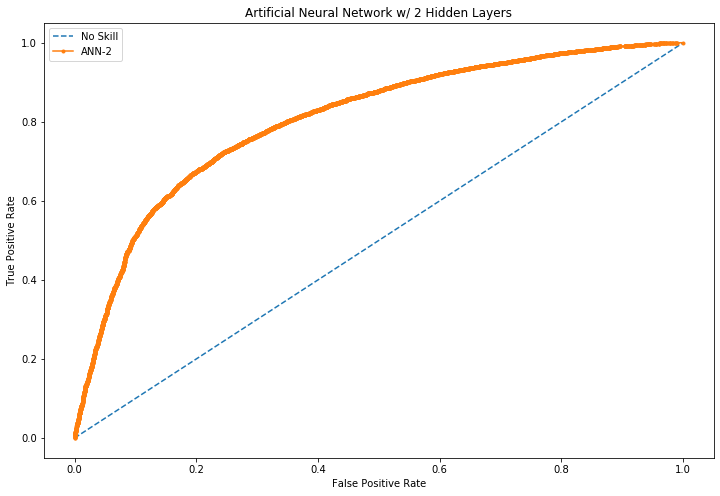

In [38]:
roc_curve_ANN(ANN2, 'Artificial Neural Network w/ 2 Hidden Layers','ANN-2')

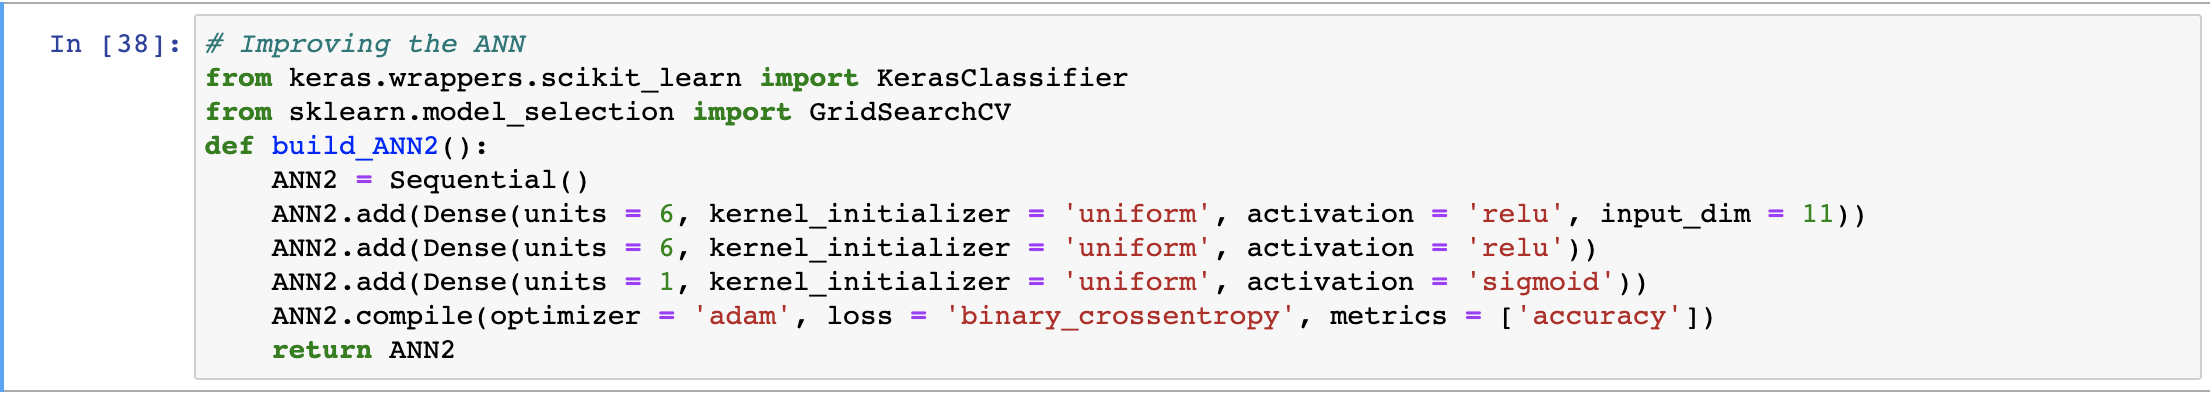

# Grid Searching our ANN

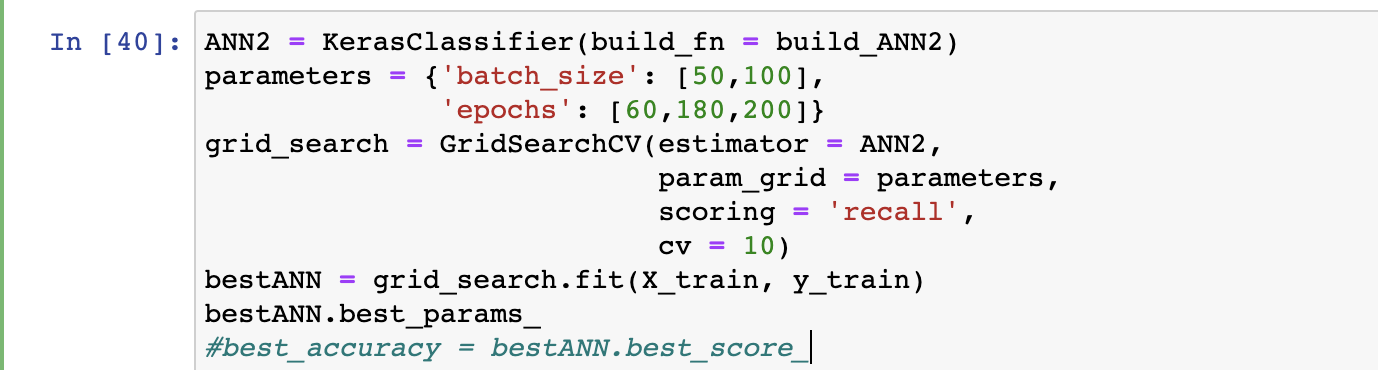

# Recall and Accuracy are up for both ANN's that contain hidden layers. 
With regards to hyperparamter tuning; the smaller the batch_size, the less accurate the estimate of the gradient seemed to be and the more time consuming the process was overall. However, as more layers are added the complexity is increased which is why smaller batch sizes were fed to the model. A larger number of epochs was required to converge on a minimum as well. 

# Section 3: Combination and Comparison of Multiple Machine Learning Algorithms (20%)
• Apply decision tree learning algorithm and fine tune the model on the disease dataset. 

# Building our Decision Tree Classifer:

In [39]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train, y_train) #scaled

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [40]:
y_predDT = d_tree.predict(X_test)

In [41]:
from sklearn import metrics

print(f"Precision:  {round(metrics.precision_score(y_test,y_predDT)*100)}%")
print(f"Recall:  {round(metrics.recall_score(y_test,y_predDT)*100)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_predDT,y_test)*100)}%")
print(confusion_matrix(y_test,y_predDT))
print(classification_report(y_test,y_predDT))

Precision:  65.0%
Recall:  64.0%
Accuracy: 64.0%
[[4698 2577]
 [2709 4716]]
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64      7275
         1.0       0.65      0.64      0.64      7425

    accuracy                           0.64     14700
   macro avg       0.64      0.64      0.64     14700
weighted avg       0.64      0.64      0.64     14700



# Decision Tree

# Decision tree hyperaparameters were transferred from the RandomForest Model and then progressively tweaked until an optimized model was reached
- Entropy, a measure of dataset impurity was used as the basis for making the splits in our model. Subsets of the data that are completely pure will not be split any further and will thus become leaf nodes. 

In [42]:
d_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, 
max_leaf_nodes = 20, 
min_samples_leaf = 1, 
min_samples_split = 2) 
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
y_pred = d_tree.predict(X_test)
print(f"Precision:  {round(metrics.precision_score(y_test, y_pred)*100,2)}%")
print(f"Recall:  {round(metrics.recall_score(y_test, y_pred)*100,2)}%")
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100,2)}%")
print(f"ROC_AUC: {round(roc_auc_score(y_test, y_pred)*100,2)}%")

Precision:  73.78%
Recall:  73.21%
Accuracy: 73.33%
ROC_AUC: 73.33%


This has yielded some of the most consistent and finest results across each of our models surprisingly enough. Accuracy and Recall are balanced with class and the graph below shows an AUC of 79.87% which shows us that this model has performed extremely well overall in the context of this data 

Best Decision Tree 
ROC AUC:  79.87%


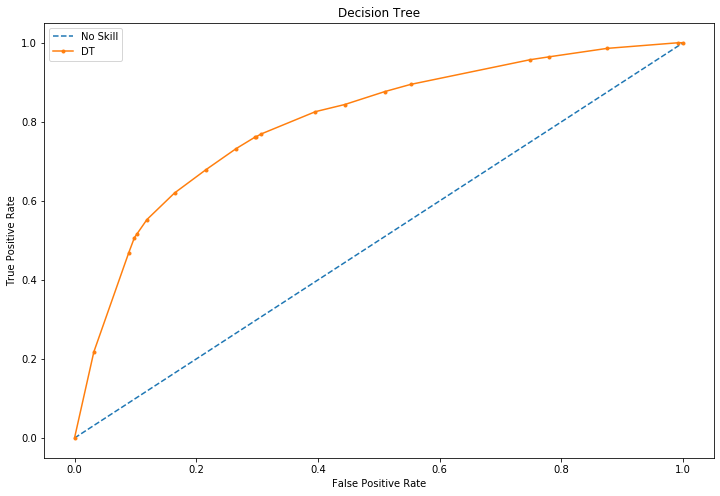

In [44]:
print("Best Decision Tree ")
roc_curve_plot(d_tree, 'Decision Tree', 'DT')

# Feature Importance for Decision Tree

In [45]:
df_imp = df.drop('Disease', axis=1)
# RUN FEATURE IMPORTANCE
# Calculate feature importances
importances = d_tree.feature_importances_
feature_importances = pd.DataFrame(importances,
             index = df_imp.columns,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)
feature_importances.head()
fig_fi = px.bar(feature_importances, y = 'Feature Importance', x = feature_importances.index, title="Feature Importance: Decision Tree")
fig_fi.show()

### After changing the split criterion to entropy and increasing the max_depth from 5-7, this quickly became one of our most valuable models. It should also be noted that low blood pressure has the highest feature importance. This is towering over age and cholesterol which is a very bizarre thought at first. I suspect that, after scaling our data, our model has found completely new features to split on in terms of purity. 
### For reference, Our RandomForest classifier's (unscaled) contains Age,Gender, Height and Weight, respectively as its most important features.
- Additionally this confirms that binary attributes such as Smoke Alcohol and Exercise aren't terribly important to our model. 
### RandomForestFeature Importance Comparison
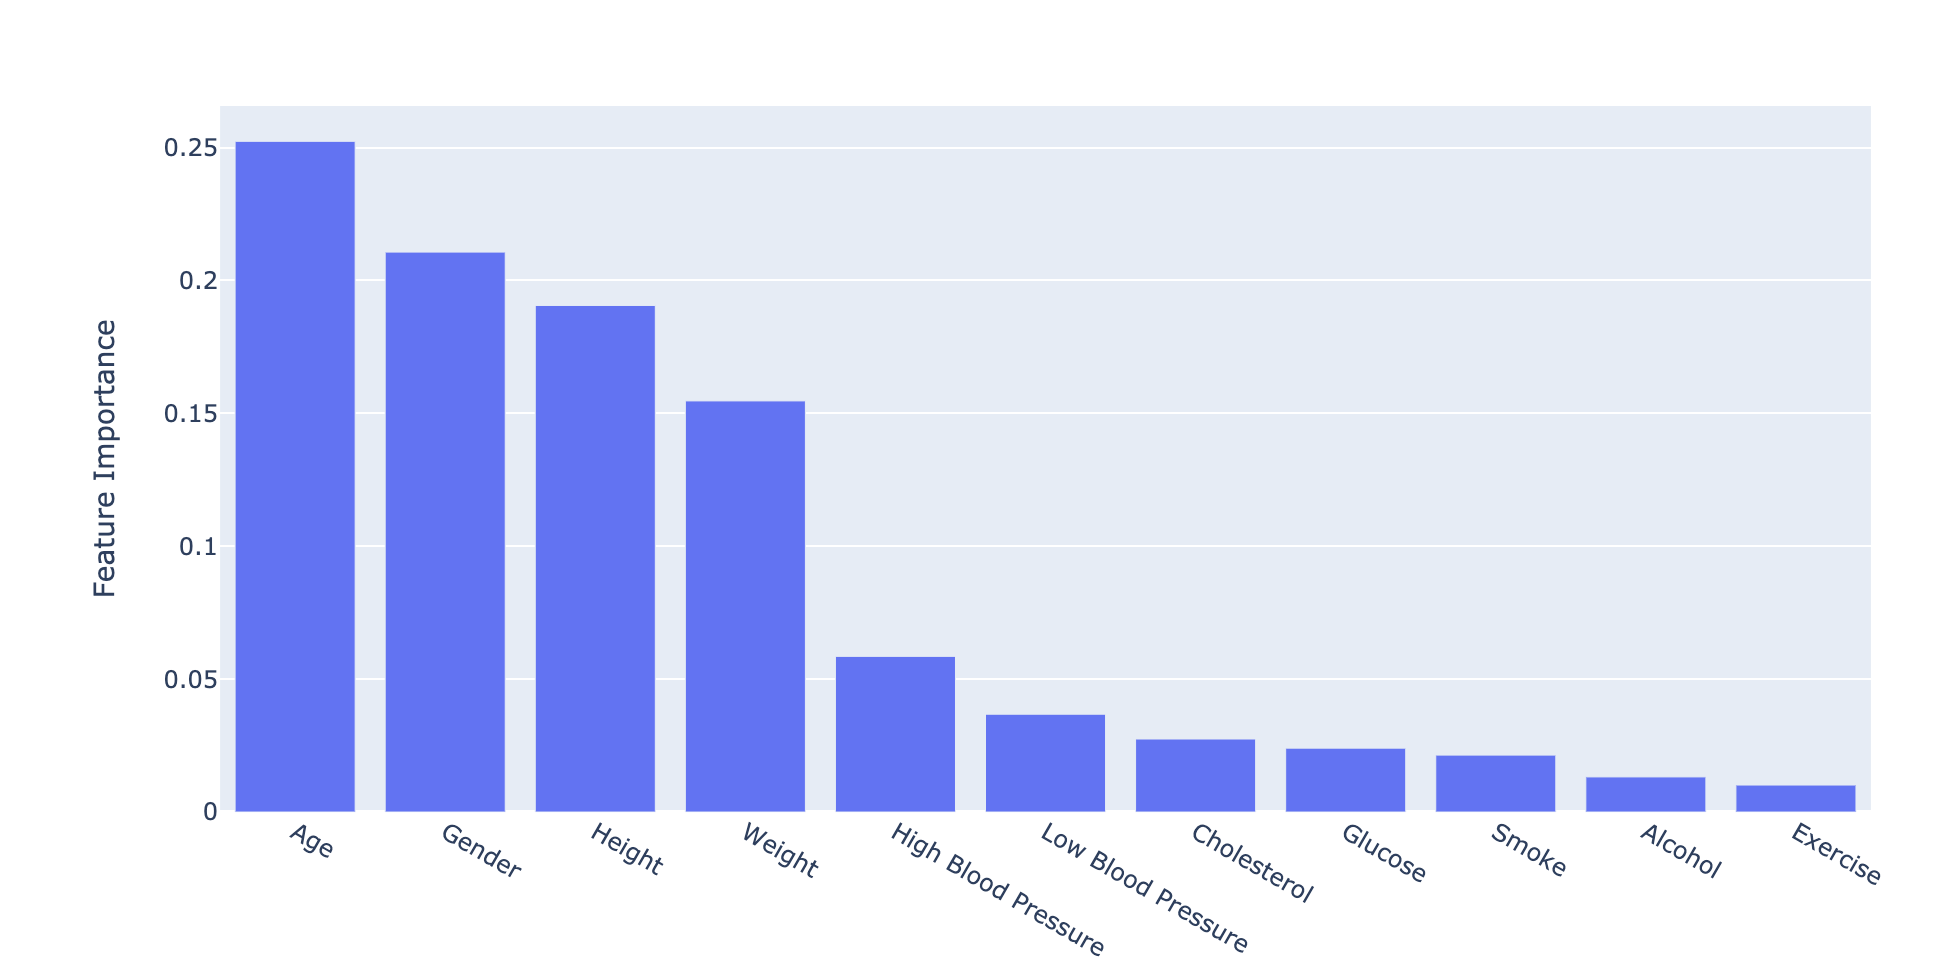

# MODEL PERFORMANCE MASTER TABLE

In [46]:
from plotly import graph_objects as go
fig = go.Figure(layout = {"title":  "Model Performance Master Table"},
                data=[go.Table(header=dict(values=["Algorithm","Key hyperparamters","Recall (key metric)","Accuracy","Estimated RunTime"]),
                cells=dict(values=[["DT","ANN1","ANN2","RF","SVC-RBF","X-GBM","KNN","ANN0","SVC-Lin","GNB"],
                                   ["entropy, max_depth=7, max_leaf_nodes=20",
                                    "adam, binary_crossentropy, batch_size:85, epochs:150",
                                    "adam, binary_crossentropy, batch_size:42, epochs:110",
                                    "class_weight=balanced, gini, max_depth=25, max_features=sqrt, max_leaf_nodes:20",
                                    "{C: 2, gamma: 0.8, kernel: rbf}",
                                    "base_score=0.5, booster=gbtree, colsample_bylevel=1, min_child_weight=1, missing=None, n_estimators=100, objective=binarylogistic",
                                    "n_neighbors = 31, p=2",
                                    "adam, binary_crossentropy, batch_size = 100, epochs = 27",
                                    "C: 0.5, dual: False, loss: squared_hinge, penalty: l2",
                                    "priors=None, var_smoothing=1e-09"
                                    ],
                                   ["0.7321","0.7235","0.7006","0.7003","0.6984","0.6948","0.6897","0.6789","0.6708","0.6315"], #Recall
                                   ["0.7333","0.7380","0.7361","0.7088","0.7354","0.7395","0.7284","0.7309","0.7299","0.7193"], #Accuracy
                                   ["1 hr","2 hrs","3 hours","2 hours","5 hours","<5min","<5min","15 min","45 min","< 1 min"]])) #Estimated Runtime
                    ])
fig.show()

# Section 4: Prediction and interpretation (20%)
- apply models to the test dataset (Disease Prediction Testing.csv) 
- Please submit your prediction results as a CSV file with SIX columns (ID, DT, LR, ANN0, ANN1, ANN2) for the classfication results out of the pre-specified machine learning algorithms respectively.

In [47]:
df_test= pd.read_csv('Disease Prediction Testing.csv')

In [48]:
df_test.describe()

ID           Age        Height        Weight  \
count  21000.000000  21000.000000  21000.000000  21000.000000   
mean   10499.500000     52.811190    164.341381     74.241070   
std     6062.322162      6.775489      8.195082     14.548468   
min        0.000000     29.000000     64.000000     21.000000   
25%     5249.750000     48.000000    159.000000     65.000000   
50%    10499.500000     53.000000    165.000000     72.000000   
75%    15749.250000     58.000000    170.000000     82.000000   
max    20999.000000     64.000000    250.000000    183.000000   

       Low Blood Pressure  High Blood Pressure         Smoke       Alcohol  \
count        21000.000000         21000.000000  21000.000000  21000.000000   
mean           129.093429            95.960857      0.087810      0.052667   
std            167.975674           157.257409      0.283024      0.223372   
min             10.000000           -70.000000      0.000000      0.000000   
25%            120.000000            80.000000      0.000000      0.000000   
50%            120.000000            80.000000      0.000000      0.000000   
75%            140.000000            90.000000      0.000000      0.000000   
max          16020.000000          8500.000000      1.000000      1.000000   

           Exercise  
count  21000.000000  
mean       0.804952  
std        0.396247  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [49]:
# Clipping Blood Pressure to their Upper/Lower Fence Values   
df_test["High Blood Pressure"] = df_test["High Blood Pressure"].clip(upper=106)#Upper Fence = 105 
df_test["High Blood Pressure"] = df_test["High Blood Pressure"].clip(lower=65)# Lower Fence = 65 
df_test["Low Blood Pressure"] = df_test["Low Blood Pressure"].clip(upper=171)#Upper Fence = 170
df_test["Low Blood Pressure"] = df_test["Low Blood Pressure"].clip(lower=89) #Lower Fence = 90
# Clipping Height and Weight values to their 1st Percentile


In [50]:
df_test["Height"] = df_test["Height"].clip(lower=147)
df_test["Weight"] = df_test["Weight"].clip(lower=49)

In [51]:
#Replacing outliers with a value of NAN
df_test.loc[df_test['High Blood Pressure'] == 106,'High Blood Pressure'] = np.nan
df_test.loc[df_test['High Blood Pressure'] == 65,'High Blood Pressure'] = np.nan
df_test.loc[df_test['Low Blood Pressure'] == 171,'Low Blood Pressure'] = np.nan
df_test.loc[df_test['Low Blood Pressure'] == 89,'Low Blood Pressure'] = np.nan
df_test.loc[df_test['Weight'] == 49,'Weight'] = np.nan
df_test.loc[df_test['Height'] == 147,'Height'] = np.nan

In [52]:
#NOTE: HERE Males are being listed as 1 and females as 0. This assignment was completely arbitrary but necessary for our models (numeric)
df_test["Gender"] = df_test["Gender"].map({'male': 1, 'female': 0})
#df= pd.get_dummies(df_test, columns = ['Gender','Cholesterol','Glucose'])
df_test["Cholesterol"] = df_test["Cholesterol"].map({'too high': 2, 'high': 1, 'normal':0}) 
df_test["Glucose"] = df_test["Glucose"].map({'too high': 2, 'high': 1, 'normal':0})

In [53]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_test_MICE= df_test
df_test_MICE.iloc[:,:] = MICE_imputer.fit_transform(df_test)
df_test= df_test_MICE
#making our final predictions
df_test= df_test[['Age','Gender','Height','Weight','High Blood Pressure','Low Blood Pressure','Cholesterol','Glucose','Smoke','Alcohol','Exercise']]

In [54]:
df_test.describe()

Age        Gender        Height        Weight  \
count  21000.000000  21000.000000  21000.000000  21000.000000   
mean      52.811190      0.349190    164.623165     74.530922   
std        6.775489      0.476726      7.586457     14.198626   
min       29.000000      0.000000    148.000000     50.000000   
25%       48.000000      0.000000    159.000000     65.000000   
50%       53.000000      0.000000    165.000000     72.000000   
75%       58.000000      1.000000    170.000000     82.000000   
max       64.000000      1.000000    250.000000    183.000000   

       High Blood Pressure  Low Blood Pressure   Cholesterol       Glucose  \
count         21000.000000        21000.000000  21000.000000  21000.000000   
mean             81.748464          126.366216      0.368476      0.227762   
std               7.883681           15.503019      0.682474      0.573790   
min              66.000000           90.000000      0.000000      0.000000   
25%              80.000000          120.000000      0.000000      0.000000   
50%              80.000000          120.000000      0.000000      0.000000   
75%              90.000000          140.000000      1.000000      0.000000   
max             105.000000          170.000000      2.000000      2.000000   

              Smoke       Alcohol      Exercise  
count  21000.000000  21000.000000  21000.000000  
mean       0.087810      0.052667      0.804952  
std        0.283024      0.223372      0.396247  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      1.000000  
50%        0.000000      0.000000      1.000000  
75%        0.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000

# Running all tuned-models on the testing data
- Logistic Regression was trained on using MinMax, so i'll predict those labels first, then preprocess the remaining testing data using StandardScaler

In [55]:
scaler = MinMaxScaler()
scaler.fit(df_test)
scaled_test = scaler.transform(df_test)

In [56]:
#scaling the remaining testing data to between 0 and 1
y_LR_prediction = bestLR.predict(scaled_test)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_test) #scaling the remaining testing data to between -1 and 1
scaled_test = scaler.transform(df_test)

In [58]:
# Predicting labels for 4 remaining models
y_DT_prediction = d_tree.predict(scaled_test)
y_ANN0 = ANN0.predict_classes(scaled_test)
y_ANN1 = ANN1.predict_classes(scaled_test)
y_ANN2= ANN2.predict_classes(scaled_test)

In [59]:
#Outputing predictions to final dataframe for evaluation.
df_output = pd.read_csv('Disease Prediction Testing.csv')
Final = pd.DataFrame(list(zip(df_output['ID'], y_DT_prediction,y_LR_prediction,
                              y_ANN0,y_ANN1,y_ANN2)),
                     columns=['ID','DT','LR','ANN0','ANN1','ANN2'])

In [60]:
Final["ANN0"] = Final.ANN0.astype(float)
Final["ANN1"] = Final.ANN1.astype(float)
Final["ANN2"] = Final.ANN2.astype(float)

In [61]:
Final.head()

ID   DT   LR  ANN0  ANN1  ANN2
0   0  0.0  0.0   0.0   0.0   0.0
1   1  0.0  0.0   0.0   0.0   0.0
2   2  1.0  0.0   1.0   1.0   1.0
3   3  1.0  1.0   1.0   1.0   1.0
4   4  0.0  0.0   0.0   0.0   0.0

# Summary/Key Takeaways:
- Overall, each model performed extremely similarly in terms of recall, precision and accuracy. 
- This tells me that the data preprocessing steps almost definitely had the highest impact on model performance. 
- The ANN's (especially ANN2) proved to be quite effective in dealing with some of the shortcomings associated with shallow ML algorithms such as multicollinearity, however given this intuitive annd frienndly introduction to Keras, I  am now one step closer to seeing Deep Neural Nets for their full utility in the context of AI.
- Although this assignmen't has dealt with a rather simple classification problem (with most recall scores floating between 67-70% recall, 73-74% accuracy), this lens via Keras has provided a framework that allows us to improve scores from previous models(even after running GridSearch).
- I was delightfully surprised by the performance of the DecisionTree however, I would like to investigate this issue more using methods such as stratified K-folds in order to determine whether or not the model is overfitting. Regardless of that, it still showed excellent performance of these data. 
- It would also be interesting to investigate the exact impacts of StandardScaler on feature importance for each of our models to determine which kinds of variables are being used to make high I.G. splits in order to reduce dataset impurity. 
- With regards to compromise in disease modeling it is almost always better to be cautious and slightly over-diagnose. It's okay if more false positives are thrown, but if a patient has this disease and the model tells them they are fine (FN) then recall decreases and this is largely problematic. 
- This has been a wonderful crash course into Machine Learning/AI world and i'm looking forward to attacking different problems with similar methods and techniques we have learned to utilize throughout this course. 

In [62]:
Final.to_csv('HW4_pred_Ondocin.csv', index=False)